<a href="https://www.kaggle.com/code/akarshannirwan/decision-tree-manual?scriptVersionId=194773263" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Creating the Dataset.

'Pointy' and 'Floppy' for Ear shape.

'Round' and 'Not Round' for Face Shape.

'Present' and 'Absent' for Whiskers.

1 and 0 for the final prediction whether it is a cat or not.

In [2]:
Ear = np.array(['P','F','F','P','P','P','F','P','F','F'])
Face = np.array(['R','N','R','N','R','R','N','R','R','R'])
Whiskers = np.array(['P','P','A','P','P','A','A','A','A','A'])
Cat = np.array([1,1,0,0,1,1,0,1,0,0])

In [3]:
Cats = {'Ear': Ear, 'Face': Face, 'Whiskers': Whiskers, 'Cat': Cat}
Cats

{'Ear': array(['P', 'F', 'F', 'P', 'P', 'P', 'F', 'P', 'F', 'F'], dtype='<U1'),
 'Face': array(['R', 'N', 'R', 'N', 'R', 'R', 'N', 'R', 'R', 'R'], dtype='<U1'),
 'Whiskers': array(['P', 'P', 'A', 'P', 'P', 'A', 'A', 'A', 'A', 'A'], dtype='<U1'),
 'Cat': array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])}

**Making the Dictionary into a Pandas DataFrame.**

In [4]:
cats = pd.DataFrame(Cats)
cats

,Ear,Face,Whiskers,Cat
0,P,R,P,1
1,F,N,P,1
2,F,R,A,0
3,P,N,P,0
4,P,R,P,1
5,P,R,A,1
6,F,N,A,0
7,P,R,A,1
8,F,R,A,0
9,F,R,A,0


# Data Visualization

Text(0.5, 1.0, 'Ear Distribution')

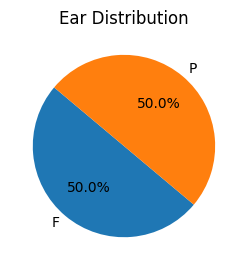

In [5]:
ear_labels, ear_counts = np.unique(Ear, return_counts=True)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.pie(ear_counts, labels=ear_labels, autopct='%1.1f%%', startangle=140)
plt.title('Ear Distribution')

Text(0.5, 1.0, 'Face Distribution')

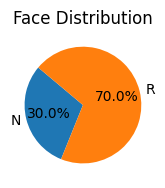

In [6]:
face_labels, face_counts = np.unique(Face, return_counts=True)
plt.subplot(1, 3, 2)
plt.pie(face_counts, labels=face_labels, autopct='%1.1f%%', startangle=140)
plt.title('Face Distribution')

Text(0.5, 1.0, 'Whiskers Distribution')

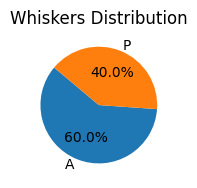

In [7]:
whiskers_labels, whiskers_counts = np.unique(Whiskers, return_counts=True)
plt.subplot(1, 3, 3)
plt.pie(whiskers_counts, labels=whiskers_labels, autopct='%1.1f%%', startangle=140)
plt.title('Whiskers Distribution')

> **Distribution**

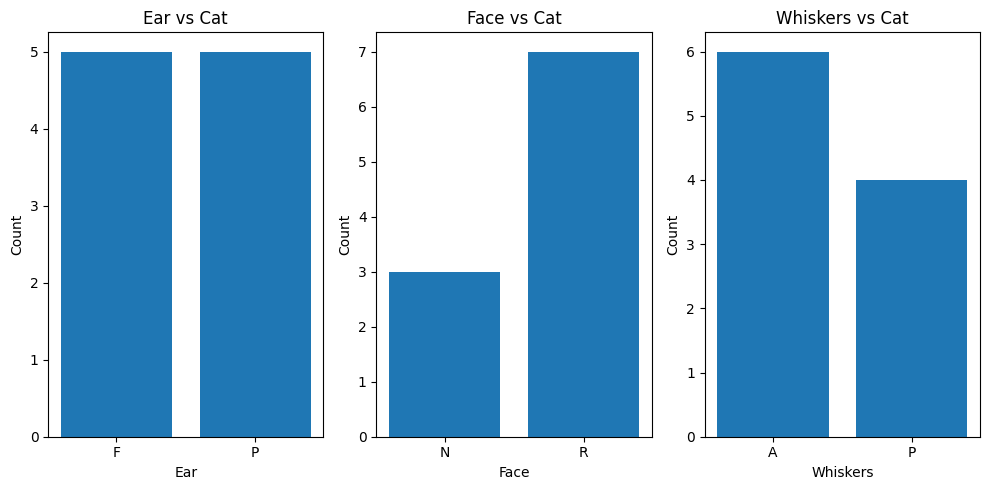

In [8]:
# Encode categorical variables into integers
labels, unique_vals = {}, {}
for feature in Cats:
    unique_vals[feature], labels[feature] = np.unique(Cats[feature], return_inverse=True)

# Bar plot for relationship between features and target variable
features = ['Ear', 'Face', 'Whiskers']
plt.figure(figsize=(10, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.bar(np.arange(len(unique_vals[feature])), np.bincount(labels[feature]), tick_label=unique_vals[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} vs Cat')

plt.tight_layout()
plt.show()

**Everything Altogether**

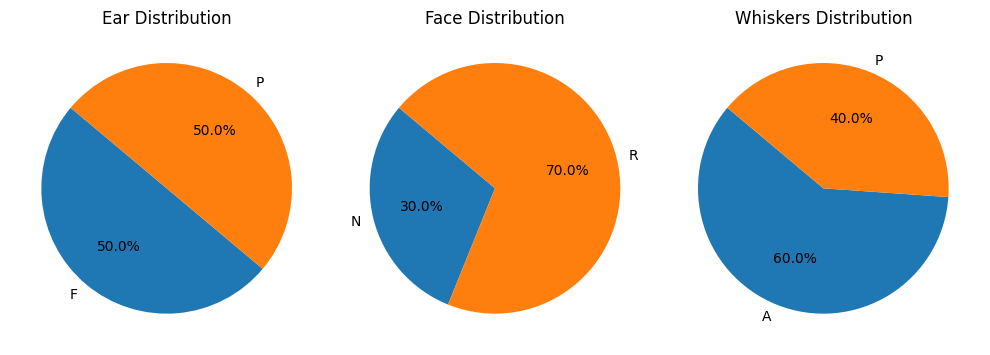

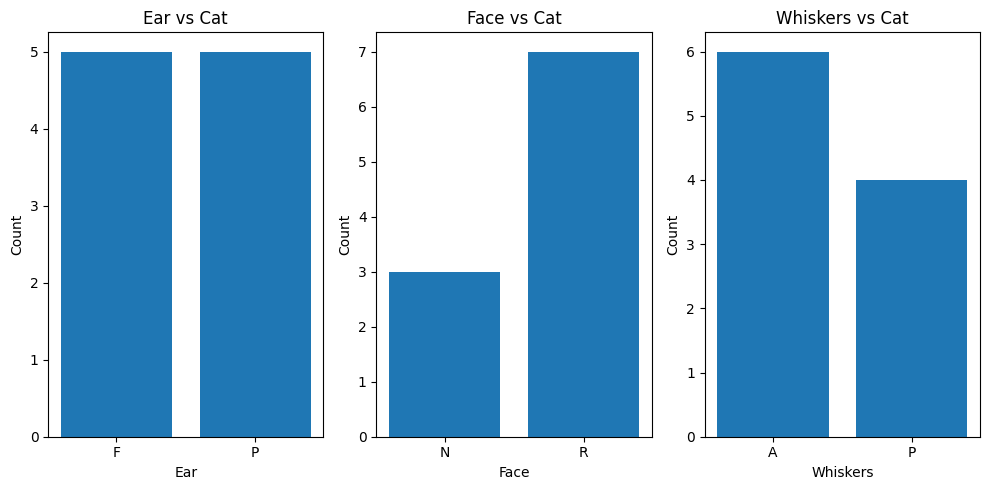

In [9]:
# Encode categorical variables into integers
labels, unique_vals = {}, {}
for feature in Cats:
    unique_vals[feature], labels[feature] = np.unique(Cats[feature], return_inverse=True)

# Pie chart for Ear
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
ear_counts = np.bincount(labels['Ear'])
plt.pie(ear_counts, labels=unique_vals['Ear'], autopct='%1.1f%%', startangle=140)
plt.title('Ear Distribution')

# Pie chart for Face
plt.subplot(1, 3, 2)
face_counts = np.bincount(labels['Face'])
plt.pie(face_counts, labels=unique_vals['Face'], autopct='%1.1f%%', startangle=140)
plt.title('Face Distribution')

# Pie chart for Whiskers
plt.subplot(1, 3, 3)
whiskers_counts = np.bincount(labels['Whiskers'])
plt.pie(whiskers_counts, labels=unique_vals['Whiskers'], autopct='%1.1f%%', startangle=140)
plt.title('Whiskers Distribution')

plt.tight_layout()
plt.show()

# Bar plot for relationship between features and target variable
features = ['Ear', 'Face', 'Whiskers']
plt.figure(figsize=(10, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.bar(np.arange(len(unique_vals[feature])), np.bincount(labels[feature]), tick_label=unique_vals[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} vs Cat')

plt.tight_layout()
plt.show()

# Performing One-Hot encoding on the data

In [10]:
from sklearn.preprocessing import OneHotEncoder
y = cats['Cat']
ohe = OneHotEncoder(sparse_output = False)
ohe

OneHotEncoder(sparse_output=False)

In [11]:
cats_data = ohe.fit_transform(cats.drop(['Cat'],axis=1))
cats_data

array([[0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0.]])

In [12]:
type(cats_data)

numpy.ndarray

**Taking p as the proportion of a value**

In [13]:
def entropy(p):
    if p == 1 or p == 0:
        return 0
    
    return -(p)*np.log2(p) - (1-p)*np.log2(1-p)

In [14]:
entropy(0.5)

1.0

As One-Hot encoding gives the array but not column name features. It will also create two different columns for binary data. Hence we can just pop the even column out.


In [15]:
format_ohe = lambda x : x[:, np.arange(x.shape[1]) % 2 != 0]
cats_final = format_ohe(cats_data)
cats_final

array([[1., 1., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 0.],
       [0., 0., 0.],
       [1., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [16]:
pdcats_final = pd.DataFrame(cats_final, columns=['Ear Shape','Face Shape','Whiskers'])
pdcats_final

,Ear Shape,Face Shape,Whiskers
0,1.0,1.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,1.0
4,1.0,1.0,1.0
5,1.0,1.0,0.0
6,0.0,0.0,0.0
7,1.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


Now to split the data into left and right subtree on the basis whether the feature is present or not.

In [17]:
def splits(X, feature):
    left_ind = []
    right_ind = []
    
    for i, x in enumerate(X):
        if x[feature] == 1.0:
            left_ind.append(i)
        else:
            right_ind.append(i)
            
    return np.array(left_ind), np.array(right_ind)

In [18]:
left, right = splits(cats_final,0)
left,right

(array([0, 3, 4, 5, 7]), array([1, 2, 6, 8, 9]))

Now we will try to get the weighted entropy of the Splits.

In [19]:
def weighted_entropy(x,y,left, right):
    w_left = len(left)/len(x)
    w_right = len(right)/len(x)
    
    p_left = sum(y[left])/len(left)
    p_right = sum(y[right])/len(right)
    
    weight = w_left*entropy(p_left) + w_right*entropy(p_right)
    
    return weight

In [20]:
y_train = np.array(y)
weighted_entropy(cats_final,y_train,left,right)

0.7219280948873623

Now we need to find the information gain to complete the final product.

In [21]:
def information_gain(x,y,left,right):
    p_root = sum(y)/len(y)
    
    return entropy(p_root) - weighted_entropy(x,y,left,right)

In [22]:
information_gain(cats_final,y_train,left,right)

0.2780719051126377

In [23]:
def highest(X,y):
    info = []
    for i, x in enumerate(np.arange(2)):
        left, right = splits(X,i)
        info.append(information_gain(X,y,left,right))
        print(f'Information Gain: {info[-1]}')
    return max(info)

In [24]:
highest(cats_final,y_train)

Information Gain: 0.2780719051126377
Information Gain: 0.034851554559677034


0.2780719051126377

Decision Tree manual Information Gain, Successfully coded.